It is *multiclass classification* problem, we'll be classifying Reuters newswires into 46 different topics. However one sample will belong to *single label*

In [16]:
from keras.datasets import reuters
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print("len train data: {}".format(len(train_data)))
print("len test data: {}".format(len(test_data)))
print("train labels: {}".format(train_labels))

# Vactorize data
def vectorize_sequences(sequenses, dimension=10000):
    results = np.zeros((len(sequenses), dimension))
    print(results.shape)
    for i, sequense in enumerate(sequenses):
        results[i, sequense] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print("Vectorized train data: {}".format(x_train[0]))
print("Vectorized test data: {}".format(x_test[0]))

len train data: 8982
len test data: 2246
train labels: [ 3  4  3 ... 25  3 25]
(8982, 10000)
(2246, 10000)
Vectorized train data: [0. 1. 1. ... 0. 0. 0.]
Vectorized test data: [0. 1. 1. ... 0. 0. 0.]


Performing one-hot encoding for labels - putting all zeros except one, dimension is 46 because we have 46 labels as output:

In [18]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print("Vectorized train label 1: {}".format(one_hot_train_labels[0]))
print("Vectorized test label 1: {}".format(one_hot_test_labels[0]))

#separate validation and training data:
part_x_train = x_train[:7900]
x_val = x_train[7900:]
part_y_train = one_hot_train_labels[:7900]
y_val = one_hot_train_labels[7900:]

Vectorized train label 1: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Vectorized test label 1: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Train on 7900 samples, validate on 1082 samples
Epoch 1/10
7900/7900 [==============================] - 2s 298us/step - loss: 2.6209 - acc: 0.5403 - val_loss: 1.9018 - val_acc: 0.6599
Epoch 2/10
7900/7900 [==============================] - 1s 141us/step - loss: 1.4952 - acc: 0.7180 - val_loss: 1.4424 - val_acc: 0.7135
Epoch 3/10
7900/7900 [==============================] - 1s 140us/step - loss: 1.0845 - acc: 0.7859 - val_loss: 1.2199 - val_acc: 0.7477
Epoch 4/10
7900/7900 [==============================] - 1s 137us/step - loss: 0.8389 - acc: 0.8335 - val_loss: 1.0979 - val_acc: 0.7625
Epoch 5/10
7900/7900 [==============================] - 1s 137us/step - loss: 0.6680 - acc: 0.8715 - val_loss: 1.0221 - val_acc: 0.7782
Epoch 6/10
7900/7900 [==============================] - 1s 137us/step - loss: 0.5417 - acc: 0.8958 - val_loss: 0.9633 - val_acc: 0.8022
Epoch 7/10
7900/7900 [==============================] - 1s 135us/step - loss: 0.4458 - acc: 0.9137 - val_loss: 0.9376 - val_acc: 0.8022


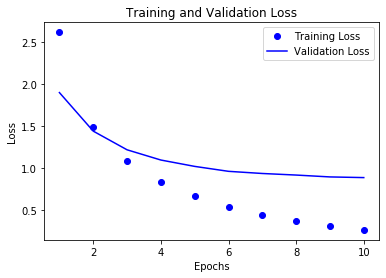

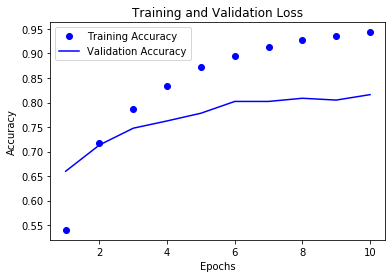

In [44]:
#  Here is model starts
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(part_x_train,
                    part_y_train,
                    batch_size=512,
                    epochs=10,
                    validation_data=(x_val, y_val)
                    )

history_dict = history.history

#  plotting results
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# second plot
#plt.clf() # uncomment to run locally

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
# performing on test data (unseen by the NN)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 111us/step
[0.029771825608831372, 0.9916276476899111]


In [45]:
# predict labels on test data:
predictions = model.predict((x_test))
for i in range(0, 10):
  print(np.argmax(predictions[i]))


3
10
1
4
13
3
3
3
3
3
